In [1]:
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sn
from sklearn.cluster import KMeans

In [2]:
ls

 Volume in drive C is Acer
 Volume Serial Number is 361B-9495

 Directory of C:\Users\Karthik\Downloads\assignments\clustering

02-02-2023  12:01    <DIR>          .
23-01-2023  11:08    <DIR>          ..
31-01-2023  14:01    <DIR>          .ipynb_checkpoints
02-02-2023  10:39            15,601 Airlines_Clustering.ipynb
02-02-2023  12:01           205,994 Crime_Clustering.ipynb
06-01-2023  20:08             1,328 crime_data.csv
06-01-2023  20:07           268,963 EastWestAirlines.xlsx
06-01-2023  20:09             1,560 Problem_Statement(Airlines).txt
06-01-2023  20:08               389 ProblemSatement(crime_data).txt
               6 File(s)        493,835 bytes
               3 Dir(s)  333,706,276,864 bytes free


In [3]:
crime=pd.read_csv("crime_data.csv")

In [4]:
crime.head()

,Unnamed: 0,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6


# Hierarchical

In [5]:
def norm_func(i):
    x=(i-i.min())/(i.max()-i.min())
    return x

In [6]:
df_crime=norm_func(crime.iloc[:,1:])

In [7]:
df_crime.iloc[:,:]

,Murder,Assault,UrbanPop,Rape
0,0.746988,0.654110,0.440678,0.359173
1,0.554217,0.746575,0.271186,0.961240
2,0.439759,0.852740,0.813559,0.612403
3,0.481928,0.496575,0.305085,0.315245
4,0.493976,0.791096,1.000000,0.860465
5,0.427711,0.544521,0.779661,0.811370
6,0.150602,0.222603,0.762712,0.098191
7,0.307229,0.660959,0.677966,0.219638
8,0.879518,0.993151,0.813559,0.635659
9,1.000000,0.568493,0.474576,0.478036


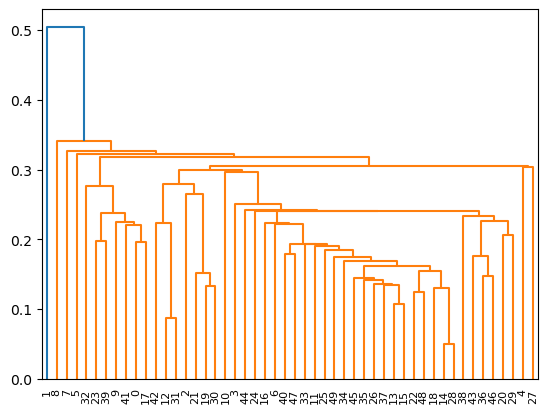

In [8]:
dendrogram=sch.dendrogram(sch.linkage(df_crime,method='single'))

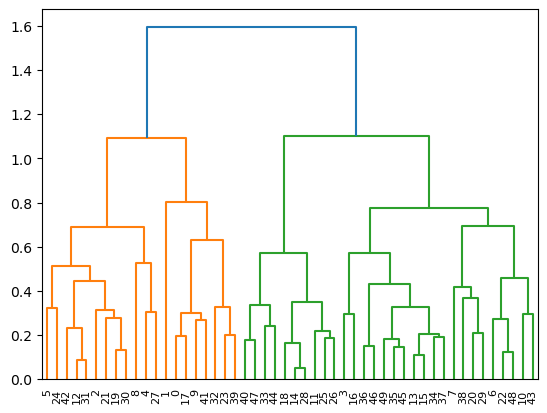

In [9]:
dendrogram=sch.dendrogram(sch.linkage(df_crime,method='complete'))

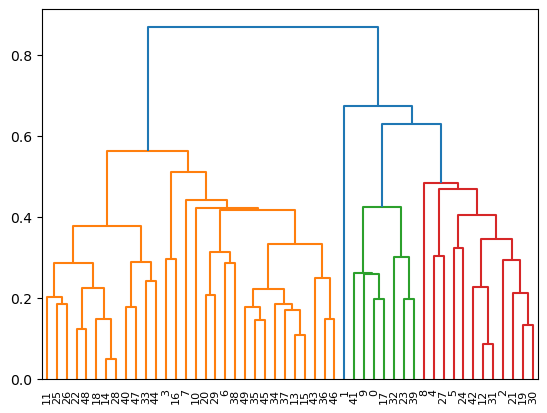

In [10]:
dendrogram=sch.dendrogram(sch.linkage(df_crime,method='average'))

In [11]:
??AgglomerativeClustering

In [12]:
hc=AgglomerativeClustering(n_clusters=5,affinity='euclidean',linkage = 'single')

In [13]:
hc.fit_predict(df_crime)

array([0, 3, 0, 0, 0, 4, 0, 1, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0], dtype=int64)

In [14]:
y_ch=hc.fit_predict(df_crime)
Clusters=pd.DataFrame(y_ch,columns=['Clusters'])

In [15]:
crime['h_clusterid']=y_ch

In [16]:
crime

,Unnamed: 0,Murder,Assault,UrbanPop,Rape,h_clusterid
0,Alabama,13.2,236,58,21.2,0
1,Alaska,10.0,263,48,44.5,3
2,Arizona,8.1,294,80,31.0,0
3,Arkansas,8.8,190,50,19.5,0
4,California,9.0,276,91,40.6,0
5,Colorado,7.9,204,78,38.7,4
6,Connecticut,3.3,110,77,11.1,0
7,Delaware,5.9,238,72,15.8,1
8,Florida,15.4,335,80,31.9,2
9,Georgia,17.4,211,60,25.8,0


In [17]:
crime.groupby(['h_clusterid'])['Unnamed: 0'].apply(lambda x:tuple(x))

h_clusterid
0    (Alabama, Arizona, Arkansas, California, Conne...
1                                          (Delaware,)
2                                           (Florida,)
3                                            (Alaska,)
4                                          (Colorado,)
Name: Unnamed: 0, dtype: object

In [18]:
crime[crime['Unnamed: 0'].isin(['Alabama','Arkansas','California','Delaware'])]

,Unnamed: 0,Murder,Assault,UrbanPop,Rape,h_clusterid
0,Alabama,13.2,236,58,21.2,0
3,Arkansas,8.8,190,50,19.5,0
4,California,9.0,276,91,40.6,0
7,Delaware,5.9,238,72,15.8,1


# kmeans

In [19]:
crime=pd.read_csv("crime_data.csv")

In [20]:
df_crime=norm_func(crime.iloc[:,1:])

In [21]:
from sklearn.cluster import KMeans

In [22]:
model_Kmeans=KMeans(n_clusters=6)
model_Kmeans.fit(df_crime)

KMeans(n_clusters=6)

In [23]:
model_Kmeans.labels_

array([1, 4, 3, 5, 3, 3, 0, 0, 3, 1, 0, 2, 3, 5, 2, 5, 5, 1, 2, 3, 0, 3,
       2, 1, 5, 2, 2, 3, 2, 0, 3, 3, 1, 2, 0, 5, 5, 0, 0, 1, 2, 1, 3, 0,
       2, 5, 0, 2, 2, 5])

In [24]:
md=pd.Series(model_Kmeans.labels_)

In [25]:
crime['labels']=pd.Series(model_Kmeans.labels_)

In [26]:
crime

,Unnamed: 0,Murder,Assault,UrbanPop,Rape,labels
0,Alabama,13.2,236,58,21.2,1
1,Alaska,10.0,263,48,44.5,4
2,Arizona,8.1,294,80,31.0,3
3,Arkansas,8.8,190,50,19.5,5
4,California,9.0,276,91,40.6,3
5,Colorado,7.9,204,78,38.7,3
6,Connecticut,3.3,110,77,11.1,0
7,Delaware,5.9,238,72,15.8,0
8,Florida,15.4,335,80,31.9,3
9,Georgia,17.4,211,60,25.8,1


In [27]:
crime.groupby(['labels'])['Unnamed: 0'].apply(lambda x:tuple(x))

labels
0    (Connecticut, Delaware, Hawaii, Massachusetts,...
1    (Alabama, Georgia, Louisiana, Mississippi, Nor...
2    (Idaho, Iowa, Maine, Minnesota, Montana, Nebra...
3    (Arizona, California, Colorado, Florida, Illin...
4                                            (Alaska,)
5    (Arkansas, Indiana, Kansas, Kentucky, Missouri...
Name: Unnamed: 0, dtype: object

In [28]:
crime[crime['Unnamed: 0'].isin(['Idaho', 'Iowa', 'Maine', 'Minnesota', 'New Hampshire'])]

,Unnamed: 0,Murder,Assault,UrbanPop,Rape,labels
11,Idaho,2.6,120,54,14.2,2
14,Iowa,2.2,56,57,11.3,2
18,Maine,2.1,83,51,7.8,2
22,Minnesota,2.7,72,66,14.9,2
28,New Hampshire,2.1,57,56,9.5,2


In [29]:
crime[crime['Unnamed: 0'].isin(['Connecticut', 'Hawaii', 'Massachusetts'])]

,Unnamed: 0,Murder,Assault,UrbanPop,Rape,labels
6,Connecticut,3.3,110,77,11.1,0
10,Hawaii,5.3,46,83,20.2,0
20,Massachusetts,4.4,149,85,16.3,0


# inferences

In [30]:
crime.columns

Index(['Unnamed: 0', 'Murder', 'Assault', 'UrbanPop', 'Rape', 'labels'], dtype='object')

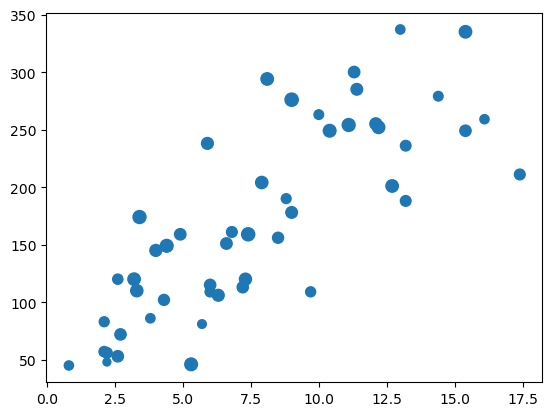

In [44]:
plt.scatter(crime['Murder'],crime ['Assault'],crime ['UrbanPop'],cmap=plt.cm.Accent)

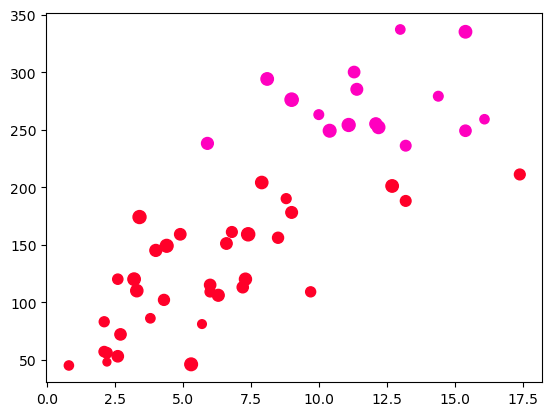

In [43]:
cluster=AgglomerativeClustering(n_clusters=2,affinity='euclidean', linkage='complete')
plt.scatter(crime['Murder'],crime['Assault'],crime['UrbanPop'],c=cluster.fit_predict(crime.iloc[:,[1,2,3]]),cmap=plt.cm.gist_rainbow)

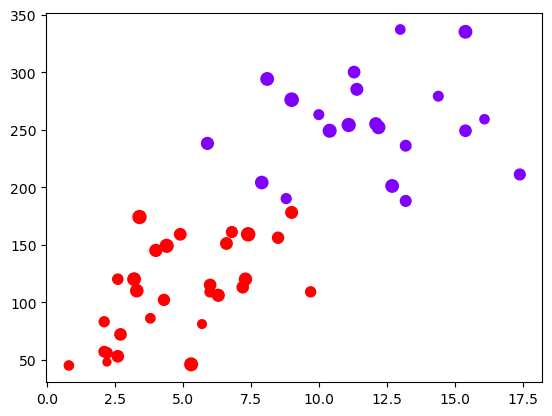

In [49]:
model=KMeans(n_clusters=2, max_iter=600, algorithm='auto')
model.fit(crime.iloc[:,1:4])
plt.scatter(crime['Murder'],crime['Assault'],crime['UrbanPop'],c=model.labels_,cmap=plt.cm.rainbow)

# DBSCAN

In [31]:
from sklearn.cluster import DBSCAN
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler

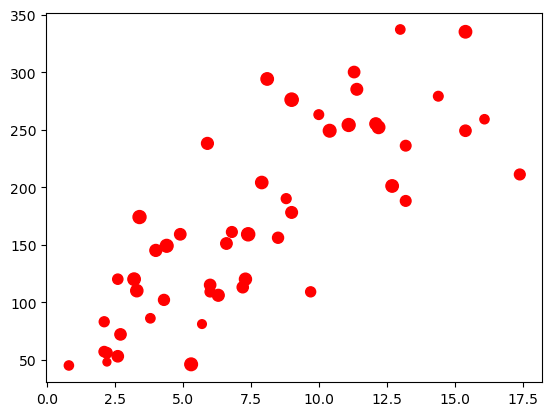

In [32]:
dbs=DBSCAN(min_samples=2,eps=0.2)
class_pr=dbs.fit_predict(crime.iloc[:,1:5])
plt.scatter(crime['Murder'],crime['Assault'],crime['UrbanPop'],c=class_pr,cmap=plt.cm.rainbow_r)

# finding the optimal number of clusters

In [33]:
crime=pd.read_csv('crime_data.csv')

In [34]:
nc=[1,2,3,4,5,6,7,8,9]
iner=[]
for i in nc:
    Km=KMeans(i)
    Km.fit(crime.iloc[:,1:5])
    iner.append(Km.inertia_)

C:\Users\Karthik\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


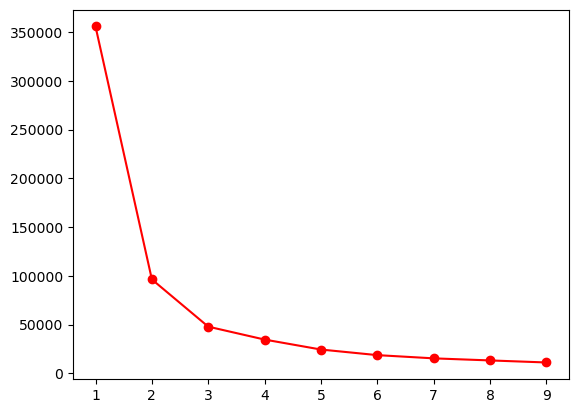

In [35]:
plt.plot(nc,iner,color='red')
plt.scatter(nc,iner,color='red')
plt.show()

# silhouette_score

In [36]:
from sklearn.metrics import silhouette_score as sil

In [37]:
nc=[2,3,4,5,6,7,8,9,]
sc_score=[]
for i in nc:
    hc=AgglomerativeClustering(n_clusters=i,affinity='euclidean',linkage='complete')
    
    y=hc.fit_predict(crime.iloc[:,1:5])
    sc_score.append(sil(crime.iloc[:,1:5],y))

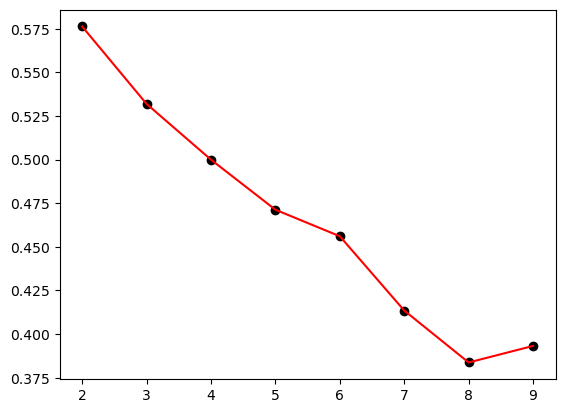

In [38]:
plt.plot(nc,sc_score,color='red')
plt.scatter(nc,sc_score,color='black')
plt.show()